This script tries to find any issue with the STOI method, by add noise to a reference wave file (not reconstructed wave file).

Issue 1: The ESTOI score is calculated using ONLY the speech data identified from the clean audio file, which means it doesn't account for any misalignment between clean audio and reconstructed (noise) audio.

Issue 2: The ESTOI score is not sensitive to the overall shift of the spectrogram.

Optimal matrix: ESTOI + MCD;

In [2]:
from pystoi import stoi
import soundfile as sf
from dSPEECH.evaluation_matrix.utils import create_mixed_audio_file_with_soundfile
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from scipy.io import wavfile

In [10]:
folder='D:/data/BaiduSyncdisk/SingleWordProductionDutch/sub-02/'
file=folder+'orig_audio.wav'
audio,sr=sf.read(file)
audio=audio[:1000000]

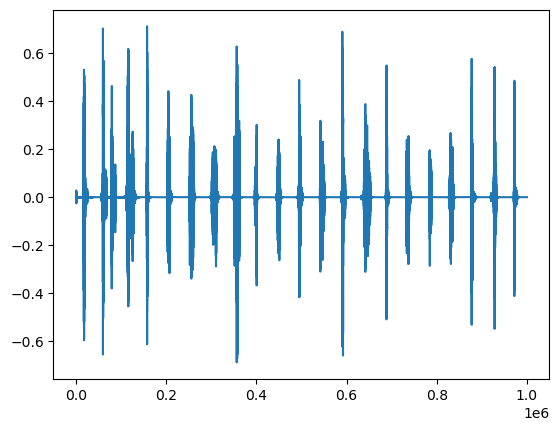

In [11]:
%matplotlib inline
fig,ax=plt.subplots()
ax.plot(audio)

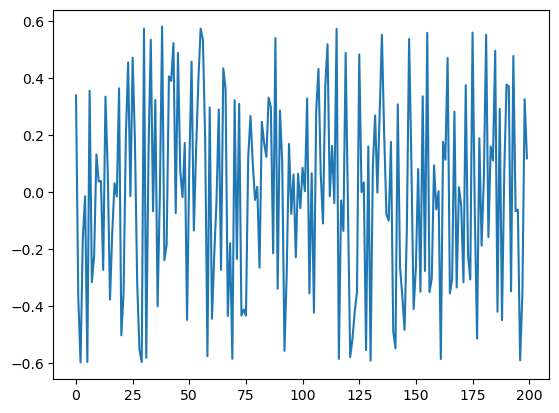

In [20]:
noise=uniform(-0.6,0.6,len(audio))
plt.plot(noise[:200])

In [28]:
file=folder+'noise.wav'
wavfile.write(file,sr,noise.astype(np.float32))
file=folder+'audio.wav'
wavfile.write(file,sr,audio.astype(np.float32))

Mix the audio with the noise (SNR: [50,40,30,20,10,5,0,-5,-10,-20,-30,-40,-50]), using command below:

python .\dSPEECH\evaluation_matrix\utils\create_mixed_audio_file_with_soundfile.py --clean_file D:\data\BaiduSyncdisk\SingleWordProductionDutch\sub-02\audio.wav --noise_file D:\data\BaiduSyncdisk\SingleWordProductionDutch\sub-02\noise.wav --snr 1 --output_mixed_file D:\data\BaiduSyncdisk\SingleWordProductionDutch\sub-02\mixed1db.wav

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]
[0.6414242901616257, 0.47046366981109294, 0.4700686892420455, 0.4698698107008086, 0.4697489108722903, 0.46966732913196285, 0.4696084567629427, 0.4695639239688739, 0.4695290389654571, 0.46950096199332936, 0.46947787128714813, 0.4694585434165315, 0.46944212579223366]


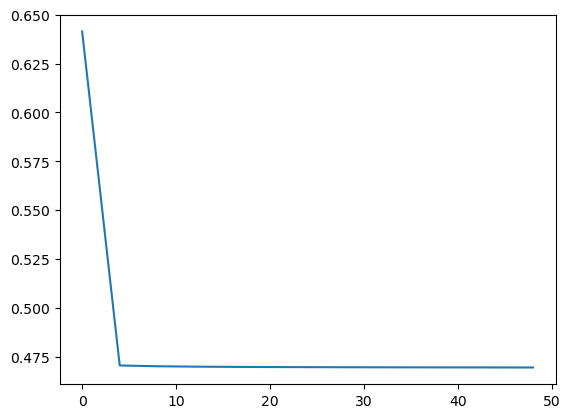

In [23]:
from dSPEECH.evaluation_matrix.pystoi import  stoi
clean, fs = sf.read(r'D:\data\BaiduSyncdisk\SingleWordProductionDutch\sub-02\audio.wav')
denoised, fs = sf.read(r'D:\data\BaiduSyncdisk\SingleWordProductionDutch\sub-02\mixed-10db.wav')

#0:0.64, 1:
length=len(clean) #s # len(clean) / int(2*fs)

scores=[]
shifts=list(range(0,50,4))
for shift in shifts:
    score = stoi(clean[:length], denoised[:length], fs, extended=False, shift=shift)
    scores.append(score)
print(shifts)
print(scores)

%matplotlib inline
plt.plot(shifts,scores)
